In [1]:
import lib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_range = (0, 800, 0.1)
stimulus = lib.constant_stimulus(dc_stimulus=100, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()

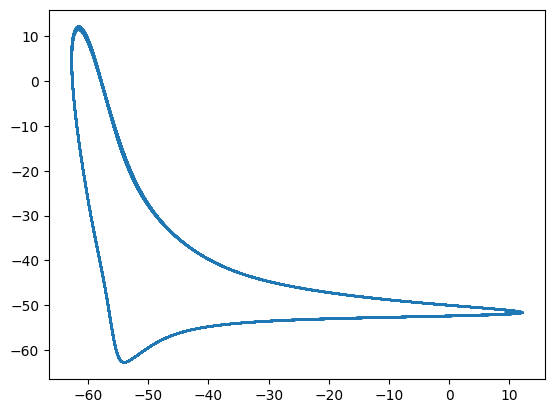

In [3]:
delay = 20
start = 2000
plt.plot((neuron.sol[delay:, 0])[start:], neuron.sol[:-delay, 0][start:])

Text(0.5, 0, 'constant current (pA)')

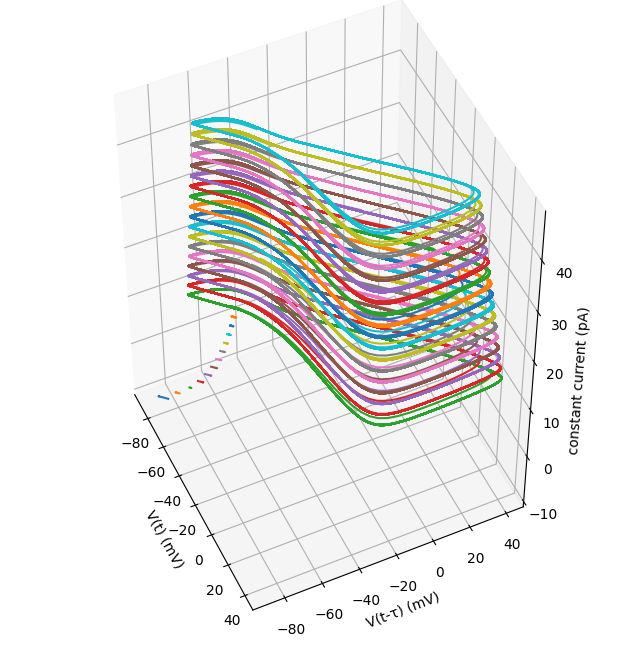

In [38]:
from mpl_toolkits import mplot3d

time_range = (0, 400, 0.02)
plot_delay = 10
plot_start = 500
ax = plt.figure().add_subplot(111, projection="3d")
fig = plt.gcf()
fig.set_size_inches(10, 8)
for i in np.arange(-10, 50, 2):
    stimulus = lib.constant_stimulus(dc_stimulus=i, time_range=time_range, time_constant=10)
    neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
    neuron.generate_sol()
    ax.plot((neuron.sol[plot_delay:, 0])[plot_start:], neuron.sol[:-plot_delay, 0][plot_start:], zs=i)
    # plt.plot((neuron.sol[plot_delay:, 0])[-1], neuron.sol[:-plot_delay, 0][-1], marker=".", markersize=10, zs=i)
ax.view_init(elev=50., azim=-25, roll=0)
ax.set_box_aspect((1, 1, 1.5))
ax.set_xlabel("V(t) (mV)")
ax.set_ylabel("V(t-τ) (mV)")
ax.set_zlabel("constant current (pA)")
# ax.set_zlabel("constant current")

In [5]:
time_range = (0, 8000, 0.02)
n_points = len(np.arange(*time_range))
constant_current_duration = 500
n_current_plateaus = n_points//constant_current_duration
np.random.seed(42)
random_i = np.random.uniform(-20, 90, size=(n_current_plateaus, 1))
stimulus_list = (np.ones((n_current_plateaus, constant_current_duration))*random_i).reshape((-1, ))
stimulus = lib.custom_stimulus(stimulus_list=stimulus_list, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()

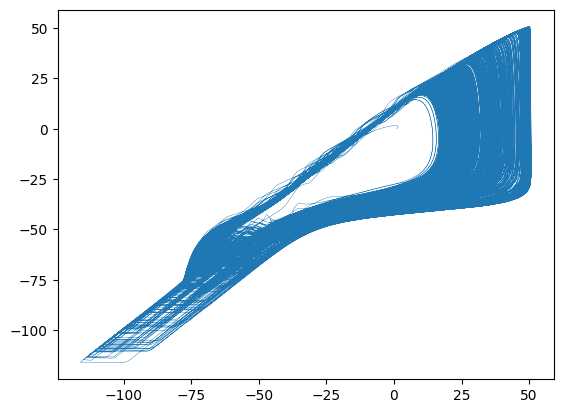

In [6]:
plot_delay = 10
plot_start = 0
plot_spacing = 1
# ax = plt.figure().add_subplot(projection="3d")
x = (neuron.sol[plot_delay:, 0])[plot_start:]
y = neuron.sol[:-plot_delay, 0][plot_start:]
# z = stimulus.stimulus_list[plot_delay:][plot_start:]
# plt.plot(x[::plot_spacing], y[::plot_spacing], zs=z[plot_spacing])
plt.plot(x[::plot_spacing], y[::plot_spacing], linewidth=.3)

(-75.0, -60.0)

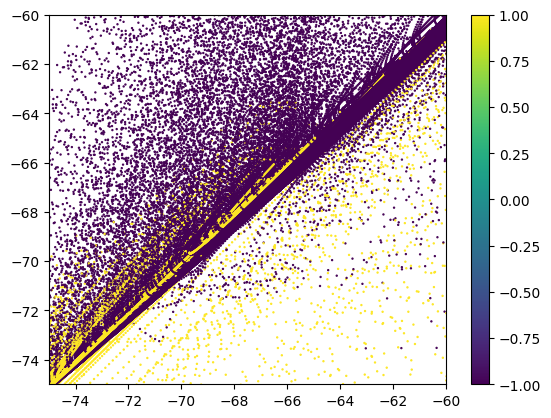

In [7]:
x = neuron.sol[plot_delay:, 0]
y = neuron.sol[:-plot_delay, 0]
dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]
i = stimulus.stimulus_list[plot_delay:-1]
dx = dx/time_range[2] - i
x = x[:-1]
y = y[:-1]
plot_spacing = 1
# plt.quiver(x[::plot_spacing], y[::plot_spacing], dx[::plot_spacing], dy[::plot_spacing])
# plt.scatter(x[::plot_spacing], y[::plot_spacing], c=np.clip(dx[::plot_spacing], a_min=None, a_max=1), s=0.5)
plt.scatter(x[::plot_spacing], y[::plot_spacing], c=np.sign(dx[::plot_spacing]), s=0.5)
plt.colorbar()
plt.xlim(-75, -60)
plt.ylim(-75, -60)


(-80.0, -50.0)

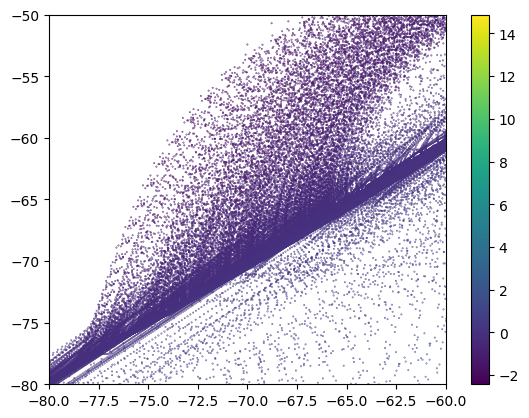

In [8]:
plt.scatter(x[::plot_spacing], y[::plot_spacing], c=dy[::plot_spacing], s=0.1)
plt.colorbar()
plt.xlim(-80, -60)
plt.ylim(-80, -50)

solution obtained!


Text(0, 0.5, 'V(t-τ) (mV)')

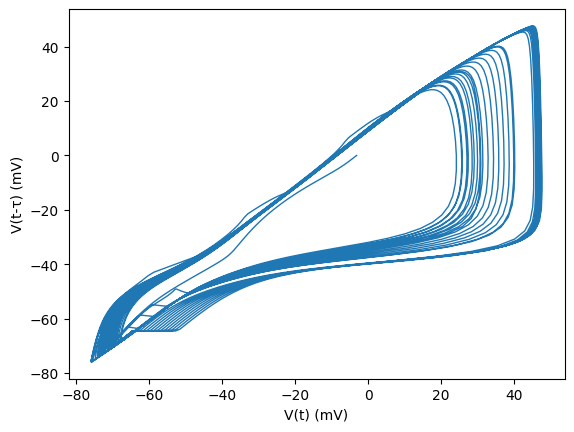

In [42]:
time_range = (0, 500, 0.02)
n_points = len(np.arange(*time_range))
stimulus_list = np.ones(n_points)*(0)

# current_plateaus_size = 1000


stimulus_list[np.arange(1000, 2000)] = 10
# stimulus_list[np.arange(2000, 2050)] = np.arange(60, 0, -60/50)
stimulus_list[np.arange(3000, 4000)] = 20
stimulus_list[np.arange(5000, 6000)] = 30
stimulus_list[np.arange(7000, 8000)] = 40
stimulus_list[np.arange(9000, 10000)] = 50
stimulus_list[np.arange(11000, 12000)] = 60
stimulus_list[np.arange(13000, 14000)] = 65
stimulus_list[np.arange(15000, 16000)] = 55
stimulus_list[np.arange(17000, 18000)] = 45
stimulus_list[np.arange(19000, 20000)] = 35
stimulus_list[np.arange(21000, 22000)] = 25
stimulus_list[np.arange(23000, 24000)] = 15
stimulus = lib.custom_stimulus(stimulus_list=stimulus_list, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()
print("solution obtained!")
plot_delay = 10
plot_start = 0
x = (neuron.sol[plot_delay:, 0])[plot_start:]
y = neuron.sol[:-plot_delay, 0][plot_start:]
plt.plot(x, y, linewidth=1)
# plt.plot(x[np.arange(1000, 2000)-10], y[np.arange(1000, 2000)-10], linewidth=1)
# plt.plot(x[np.arange(2000, 2050)-10], y[np.arange(2000, 2050)-10], linewidth=1)
plt.xlabel("V(t) (mV)")
plt.ylabel("V(t-τ) (mV)")

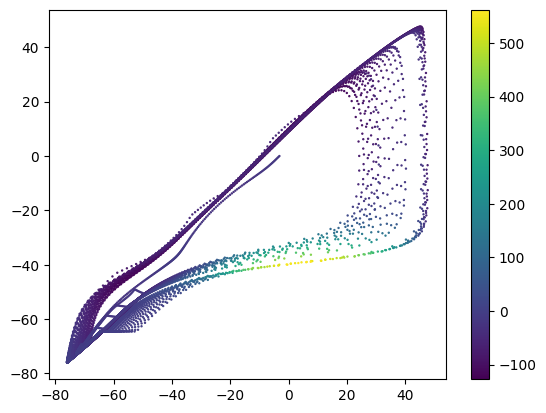

In [12]:
x = neuron.sol[plot_delay:, 0]
y = neuron.sol[:-plot_delay, 0]
dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]
i = stimulus.stimulus_list[plot_delay:]
avg_i = (i[:-1]+i[1:])/2
dx = dx/time_range[2] - avg_i
# dx = dx
x = x[:-1]
y = y[:-1]
# plt.quiver(x[::plot_spacing], y[::plot_spacing], dx[::plot_spacing], dy[::plot_spacing])
# plt.scatter(x[::plot_spacing], y[::plot_spacing], c=np.clip(dx[::plot_spacing], a_min=None, a_max=1), s=0.5)
plt.scatter(x, y, c=dx, s=0.5)
# plt.scatter(x, y, c=np.clip(dx, a_min=None, a_max=2), s=0.5)
plt.colorbar()

solution obtained!


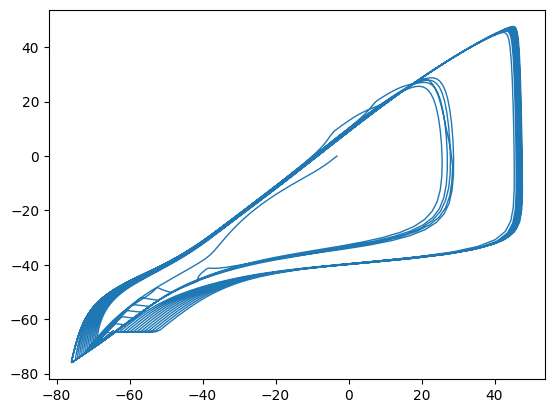

In [11]:
time_range = (0, 500, 0.02)
n_points = len(np.arange(*time_range))
stimulus_list = np.ones(n_points)*(0)

current_plateaus_size = 500
stimulus_list[np.arange(1000, 1000+current_plateaus_size)] = 10
# stimulus_list[np.arange(2000, 2050)] = np.arange(60, 0, -60/50)
stimulus_list[np.arange(3000, 3000+current_plateaus_size)] = 20
stimulus_list[np.arange(5000, 5000+current_plateaus_size)] = 30
stimulus_list[np.arange(7000, 7000+current_plateaus_size)] = 40
stimulus_list[np.arange(9000, 9000+current_plateaus_size)] = 50
stimulus_list[np.arange(11000, 11000+current_plateaus_size)] = 60
stimulus_list[np.arange(13000, 13000+current_plateaus_size)] = 65
stimulus_list[np.arange(15000, 15000+current_plateaus_size)] = 55
stimulus_list[np.arange(17000, 17000+current_plateaus_size)] = 45
stimulus_list[np.arange(19000, 19000+current_plateaus_size)] = 35
stimulus_list[np.arange(21000, 21000+current_plateaus_size)] = 25
stimulus_list[np.arange(23000, 23000+current_plateaus_size)] = 15


stimulus = lib.custom_stimulus(stimulus_list=stimulus_list, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()
print("solution obtained!")
plot_delay = 10
plot_start = 0
x = (neuron.sol[plot_delay:, 0])[plot_start:]
y = neuron.sol[:-plot_delay, 0][plot_start:]
plt.plot(x, y, linewidth=1)
# plt.plot(x[7000:7000+current_plateaus_size], y[7000:7000+current_plateaus_size], linewidth=1)
# plt.plot(x[np.arange(2000, 2050)-10], y[np.arange(2000, 2050)-10], linewidth=1)

Text(0, 0.5, 'current (pA)')

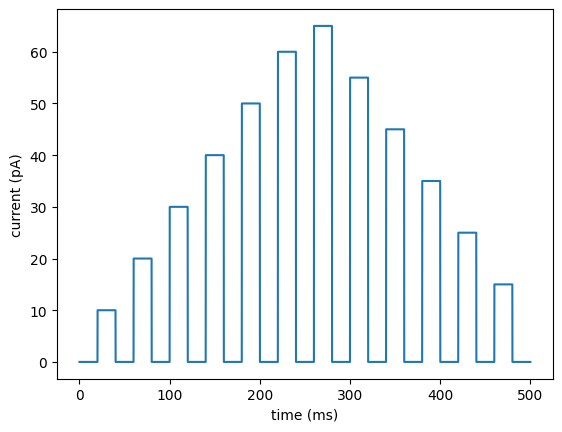

In [41]:
plt.plot(np.arange(0, 500, 0.02), stimulus_list)
plt.xlabel("time (ms)")
plt.ylabel("current (pA)")

solution obtained!


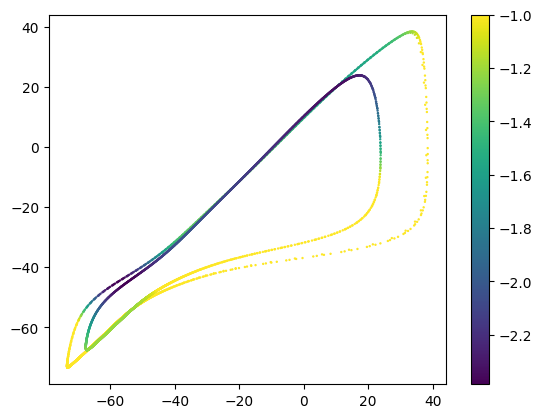

In [28]:
%matplotlib inline
time_range = (0, 200, 0.02)
n_points = len(np.arange(*time_range))
stimulus_list = np.ones(n_points)*(0)

stimulus_list[np.arange(0, 5000)] = 20
stimulus_list[np.arange(5000, 10000)] = 65


stimulus = lib.custom_stimulus(stimulus_list=stimulus_list, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()
print("solution obtained!")
plot_delay = 10
plot_start = 0
x = (neuron.sol[plot_delay:, 0])[plot_start:]
y = neuron.sol[:-plot_delay, 0][plot_start:]
# plt.plot(x[1000:4000], y[1000:4000], linewidth=1)
# plt.plot(x[6000:], y[6000:], linewidth=1)

dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]
i = stimulus.stimulus_list[plot_delay:]
avg_i = (i[:-1]+i[1:])/2
dx = dx - avg_i*time_range[2]

plt.scatter(x[1000:4000], y[1000:4000], c=np.clip(dx[1000:4000], a_min=None, a_max=-1), s=0.5)
plt.scatter(x[6000:-1], y[6000:-1], c=np.clip(dx[6000:], a_min=None, a_max=-1), s=0.5)
plt.colorbar()
# plt.xlim(0, 20)
# plt.ylim(10, 30)

solution obtained!


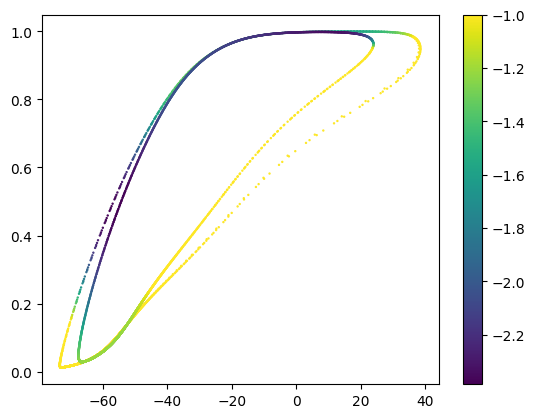

In [13]:
%matplotlib inline
time_range = (0, 200, 0.02)
n_points = len(np.arange(*time_range))
stimulus_list = np.ones(n_points)*(0)

stimulus_list[np.arange(0, 5000)] = 20
stimulus_list[np.arange(5000, 10000)] = 65


stimulus = lib.custom_stimulus(stimulus_list=stimulus_list, time_range=time_range, time_constant=10)
neuron = lib.single_neuron_odeint(stimulus, [0, 0, 0, 0])
neuron.generate_sol()
print("solution obtained!")
plot_delay = 10
plot_start = 0
x = (neuron.sol[plot_delay:, 0])[plot_start:]
y = neuron.sol[plot_delay:, 1][plot_start:]
# plt.plot(x[1000:4000], y[1000:4000], linewidth=1)
# plt.plot(x[6000:], y[6000:], linewidth=1)

dx = x[1:] - x[:-1]
dy = y[1:] - y[:-1]
i = stimulus.stimulus_list[plot_delay:]
avg_i = (i[:-1]+i[1:])/2
dx = dx - avg_i*time_range[2]

plt.scatter(x[1000:4000], y[1000:4000], c=np.clip(dx[1000:4000], a_min=None, a_max=-1), s=0.5)
plt.scatter(x[6000:-1], y[6000:-1], c=np.clip(dx[6000:], a_min=None, a_max=-1), s=0.5)
plt.colorbar()
# plt.xlim(0, 20)
# plt.ylim(10, 30)

Text(0.5, 0.5, 'Y')

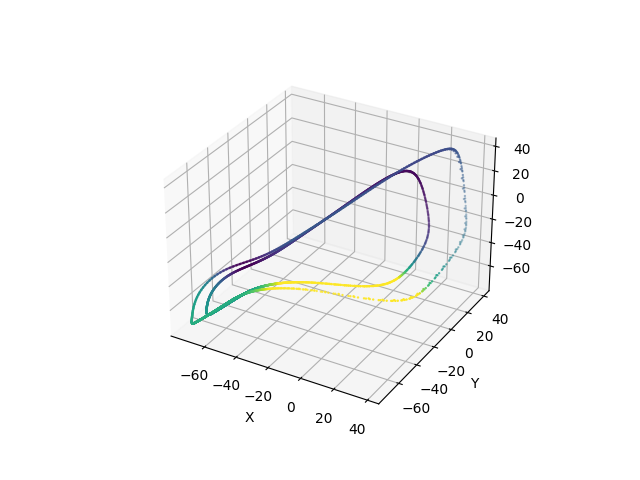

In [31]:
%matplotlib widget
plot_delay = 10
plot_start = 0
x = (neuron.sol[2*plot_delay:, 0])[plot_start:]
y = (neuron.sol[plot_delay:-plot_delay, 0])[plot_start:]
z = neuron.sol[:-2*plot_delay, 0][plot_start:]

dx = x[1:] - x[:-1]
ax = plt.figure().add_subplot(projection="3d")
# plt.plot(x[1000:4000], y[1000:4000], z[1000:4000], linewidth=1)
# plt.plot(x[6000:], y[6000:], z[6000:], linewidth=1)
ax.scatter(x[1000:4000], y[1000:4000], z[1000: 4000], c=np.clip(dx[1000:4000], a_min=None, a_max=1), s=0.5)
ax.scatter(x[6000:-1], y[6000:-1], z[6000: -1], c=np.clip(dx[6000:], a_min=None, a_max=1), s=0.5)
# ax.axes.set_xlim3d(left=-70, right=-60) 
# ax.axes.set_ylim3d(bottom=-70, top=-60) 
# ax.axes.set_zlim3d(bottom=-70, top=-60) 
plt.xlabel("X")
plt.ylabel("Y")
# ax.view_init(azim=-45)
# plt.show()